<a href="https://colab.research.google.com/github/Coyote-Schmoyote/mask-detection/blob/main/Object_detection_end_to_end_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object detection
Object detection is a computer vision task that is used to identify objects and their location inside an image. Object detection is often confused with image recognition, however, these two tasks are two distinct tasks. Image recognition assigns a label to an image. For example, a picture of a cat receives athe label "cat." Object detection, on the other hand, draws a bounding box around the cat, and labels the box "cat." In other words, object detection algorithm provides more information about hte target image than an image recognirion alogirthm.

### Basic Structure
A deeplearning based object detection typically consists of an encoder and a decoder. The encoder part takes an image input and runs it through a series of blocks and layers that extract essential features to locate and label objects. The output of the encoder is then passed to a decoder, which predicts bounding boxes and tags them with a label. 

Object detection has a number of real-world applications, including crowd counting, self-driving cars, video surveillance, face detection, anomaly detection, etc. 

## Object detection with dlib
The last computer vision task we will tackle using the dlib library is object detection. Object detection is based on HOG dectector for things like faces, pedestrians, and other objects. 

# Mask detection project

1. Upload dataset
2. Detect face
3. Apply facial landmarks (?)
3. Object (mask detection)


In [1]:
#import tools
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob, random

In [2]:
#install image detection tools
!pip install dlib==19.18.0
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import cv2
import dlib

In [4]:
print(f"TensorFlow version: {tf.__version__}")
print(f"Dlib version: {dlib.__version__}")
print(f"Open CV version: {cv2.__version__}")

TensorFlow version: 2.8.2
Dlib version: 19.18.0
Open CV version: 4.6.0


In [5]:
project_folder = "/content/drive/MyDrive/ml-projects/dlib-computer-vision-project/"
train_img_folder = os.path.join(project_folder, "easy-train/")

In [6]:
print(f"Nr. of images: {len(os.listdir(train_img_folder))}")

Nr. of images: 21


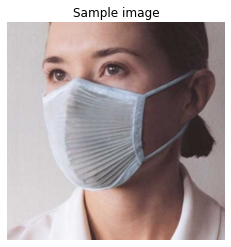

In [7]:
random_image_path = random.choice(os.listdir(train_img_folder))
random_image = os.path.join(train_img_folder, random_image_path)
random_image_load = dlib.load_rgb_image(random_image)

#display the random image
plt.imshow(random_image_load)
plt.title("Sample image")
plt.axis("off");

In [8]:
training_xml_path = os.path.join(train_img_folder, "training.xml")
print(training_xml_path)

/content/drive/MyDrive/ml-projects/dlib-computer-vision-project/easy-train/training.xml


In [9]:
options = dlib.simple_object_detector_training_options()

In [10]:
print(options)

simple_object_detector_training_options(be_verbose=0, add_left_right_image_flips=0, num_threads=4, detection_window_size=6400, C=1, epsilon=0.01, max_runtime_seconds=3.1536e+09, upsample_limit=2, nuclear_norm_regularization_strength=0)


In [25]:
"""
filenames = []

for path in os.listdir(train_data_path):
  if os.path.isfile(os.path.join(train_data_path, path)):
    filenames.append(path)

annotations = []

for file in os.listdir(train_data_path):
  if file.endswith(".xml"):
    annotations.append(file)

print(f"All files:{filenames}")
print(f"XML files:{annotations}")
"""


'\nfilenames = []\n\nfor path in os.listdir(train_data_path):\n  if os.path.isfile(os.path.join(train_data_path, path)):\n    filenames.append(path)\n\nannotations = []\n\nfor file in os.listdir(train_data_path):\n  if file.endswith(".xml"):\n    annotations.append(file)\n\nprint(f"All files:{filenames}")\nprint(f"XML files:{annotations}")\n'

In [26]:
"""
#same but shorter
annotations2 = []

for path in os.listdir(train_data_path):
  if os.path.isfile and path.endswith(".xml"):
    annotations2.append(path)

print(f"XML files: {annotations2}")
"""

'\n#same but shorter\nannotations2 = []\n\nfor path in os.listdir(train_data_path):\n  if os.path.isfile and path.endswith(".xml"):\n    annotations2.append(path)\n\nprint(f"XML files: {annotations2}")\n'

In [43]:
options.add_left_right_image_flips = True
options.C = 2
options.num_threads = 4
options.be_verbose = True

In [44]:
%%time
dlib.train_simple_object_detector(training_xml_path, "easy_detector2.svm", options)

CPU times: user 1min 30s, sys: 409 ms, total: 1min 30s
Wall time: 48.4 s


In [45]:
detector = dlib.simple_object_detector("easy_detector2.svm")

In [46]:
print(f"Training accuracy: {dlib.test_simple_object_detector(training_xml_path, detector)}")

Training accuracy: precision: 1, recall: 0.875, average precision: 0.875


In [159]:
from google.colab.patches import cv2_imshow

In [229]:
def load_img(folder_path):
  random_image_path = random.choice(os.listdir(folder_path))
  random_image = os.path.join(folder_path, random_image_path)
  rgb_image = dlib.load_rgb_image(random_image)
  print("Image loaded")
  return rgb_image

In [234]:
def change_to_bgr(img_path):
  bgr_img = cv2.cvtColor(img_path, cv2.COLOR_RGB2BGR)
  return bgr_img

In [240]:
def detect_mask(image):
  test_image = image
  boxes = detector(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
  for b in boxes:
    (x, y, w, h) = (b.left(), b.top(), b.right(), b.bottom())
    detected_image = cv2.rectangle(test_image, (x, y), (w, h), (0, 255, 0))
    font = cv2.FONT_HERSHEY_PLAIN
    detected_image = cv2.putText(test_image, "Mask", (x, y-10), font, 2.0, (0, 255, 0))
  
  cv2_imshow(test_image)

Detecting the masks...


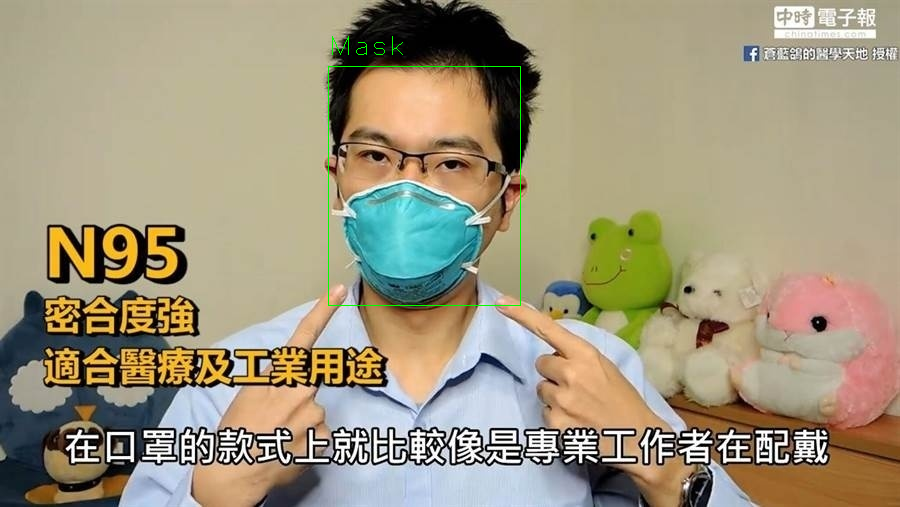

CPU times: user 167 ms, sys: 4.04 ms, total: 171 ms
Wall time: 173 ms


In [243]:
%%time
folder_path = "/content/drive/MyDrive/ml-projects/dlib-computer-vision-project/easy-test/"

loaded_img = load_img(folder_path)
test_image = change_to_bgr(loaded_img)

detect_mask(test_image)